# Results for the reimplementation of XGBoost models



In [112]:
# load the model information and scores (this function is also found in xgboost_reimplementation)
import pickle
import joblib
def read_models():
        
    models = []
    for i in range(4):
        model = joblib.load('figs_xgboost/xgboost_models/' + str(i) + '.pkl')
        models.append(model)
        
    # now load the other arrays
    test_indices_list = pickle.load(open('figs_xgboost/test_indices_list.json', 'rb'))
    best_params = pickle.load(open('figs_xgboost/best_params.json', 'rb'))
    bayes_trials_hist = pickle.load(open('figs_xgboost/bayes_trials_hist.json', 'rb'))
    
    return(models, test_indices_list, best_params, bayes_trials_hist)


models, test_indices_list, best_params, bayes_trials_hist = read_models()


/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [113]:
# loading scores:
import pickle
scores = pickle.load(open('figs_xgboost/scores.json', 'rb'))
scores

[{'mcc': 0.9441796938884999,
  'acc': 0.9592476489028213,
  'f1': array([1.        , 0.95319149, 0.90196078, 0.96969697, 0.93959732]),
  'conf_mat': array([[ 85,   0,   0,   0,   0],
         [  0, 112,   1,   0,   5],
         [  0,   2,  23,   0,   0],
         [  0,   0,   1,  16,   0],
         [  0,   3,   1,   0,  70]]),
  'precision': array([1.        , 0.95726496, 0.88461538, 1.        , 0.93333333]),
  'recall': array([1.        , 0.94915254, 0.92      , 0.94117647, 0.94594595]),
  'roc_auc': array([1.        , 0.98558057, 0.95197279, 0.99961044, 0.98830667]),
  'pr_auc': [0.9999999999999998,
   0.975237855391154,
   0.9249564018412844,
   0.9936360509115927,
   0.9667087051143102]},
 {'mcc': 0.9588772232679778,
  'acc': 0.9701986754966887,
  'f1': array([1.        , 0.97345133, 0.85106383, 1.        , 0.96598639]),
  'conf_mat': array([[ 79,   0,   0,   0,   0],
         [  0, 110,   2,   0,   1],
         [  0,   2,  20,   0,   1],
         [  0,   0,   0,  13,   0],
       

In [114]:
# getting average test accuracy and MCC
import numpy as np
print('Average testset accuracy is ', np.mean([s['acc'] for s in scores]))

print('Average testset MCC is ', np.mean([s['mcc'] for s in scores]))

print('Accuracies for each model:', [s['acc'] for s in scores])
print('MCC for each model:', [s['mcc'] for s in scores])

Average testset accuracy is  0.9601637968053189
Average testset MCC is  0.9451396271908477
Accuracies for each model: [0.9592476489028213, 0.9701986754966887, 0.9516129032258065, 0.9595959595959596]
MCC for each model: [0.9441796938884999, 0.9588772232679778, 0.9326779623220681, 0.9448236292848449]


to plot is      pooled_labels  class
1.0            462    1.0
0.0            312    0.0
4.0            303    4.0
2.0             93    2.0
3.0             58    3.0


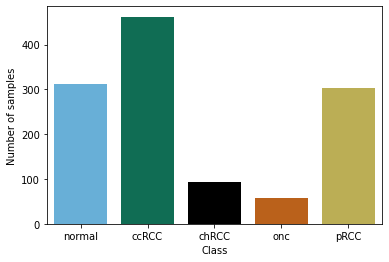

In [115]:
# getting a nice barplot of sample numbers
import pandas as pd
diagnoses = pd.read_csv('data/training_testing_diagnoses_maxgap_50_newdata.csv', sep = ',')
diagnoses = diagnoses.iloc[2:, ]
diagnoses['pooled_labels'] = np.array([4 if d == 5 else d for d in diagnoses['overallpath']])

import matplotlib.pyplot as plt
import seaborn as sb
to_plot = diagnoses['pooled_labels'].value_counts()
to_plot = pd.DataFrame(to_plot)
to_plot['class'] = to_plot.index

print('to plot is', to_plot)

bp = sb.barplot(data = to_plot, x = 'class', y= 'pooled_labels', palette = ["#56B4E9", "#007d5b", "#000000", "#D55E00", "#CCBB44"])
           
yl = plt.ylabel('Number of samples')
xl = plt.xlabel('Class')
xt = plt.xticks([0,1,2,3,4], ['normal','ccRCC', 'chRCC', 'onc', 'pRCC'])
plt.savefig('figs_xgboost/number_of_samples_barplot.svg', bbox_inches='tight')

/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pooled_labels,Source,0
0,1.0,TCGA,325
1,4.0,TCGA,276
2,0.0,TCGA,205
3,1.0,Cambridge,137
4,0.0,Cambridge,107
5,2.0,TCGA,66
6,3.0,Chopra train,37
7,4.0,Cambridge,27
8,2.0,Cambridge,27
9,3.0,Cambridge,21


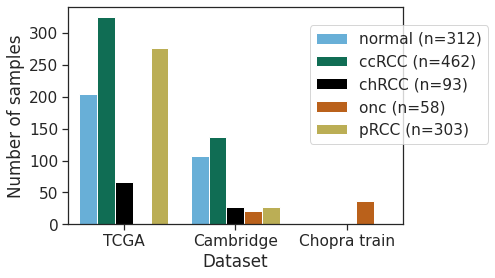

In [124]:
# do barplot split by dataset
to_plot = diagnoses
to_plot['Source'] = ''
to_plot['Source'][to_plot['colname'].str.contains('_R')] = 'Chopra train' # Chopra train
to_plot['Source'][to_plot['colname'].str.contains('TCGA')] = 'TCGA' # TCGA
to_plot['Source'][np.logical_not(to_plot['colname'].str.contains('TCGA|_R'))] = 'Cambridge' # Cambridge
to_plot = to_plot[['pooled_labels', 'Source']]

to_plot = to_plot.value_counts().reset_index()

to_plot

import matplotlib.pyplot as plt
import seaborn as sb
sb.set(font_scale=1.4) 
sb.set_style("ticks")

bp = sb.barplot(data = to_plot, x = 'Source', y=0, hue = 'pooled_labels', palette = ["#56B4E9", "#007d5b", "#000000", "#D55E00", "#CCBB44"])

# get legend labels with the total number of samples per class:
ns = diagnoses['pooled_labels'].value_counts()
labels_with_ns = ['normal (n=' + str(ns.loc[0]) + ')',
                  'ccRCC (n=' + str(ns.loc[1]) + ')',
                  'chRCC (n=' + str(ns.loc[2]) + ')',
                  'onc (n=' + str(ns.loc[3]) + ')',
                  'pRCC (n=' + str(ns.loc[4]) + ')',
                 ]

yl = plt.ylabel('Number of samples')
xl = plt.xlabel('Dataset')
handles = bp.get_legend_handles_labels()[0]
bp.legend(handles = handles, labels=labels_with_ns, loc='best', bbox_to_anchor=(0.7, -0.05, 0.25, 1))

plt.savefig('figs_xgboost/number_of_samples_barplot_separate_datasets.svg', bbox_inches='tight')



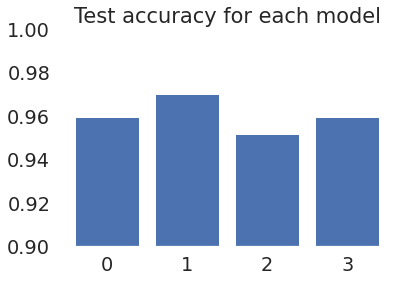

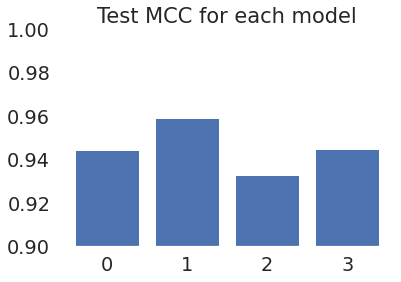

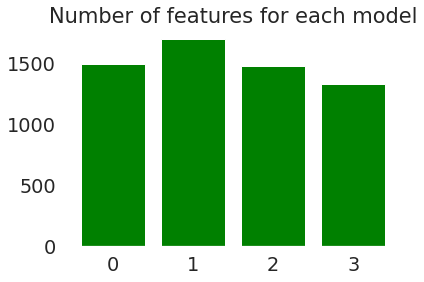

In [439]:
# plots for choosing a model
# can we choose the model with the lowest number of params (features)?

b = plt.bar(x = [i for i in range(len(scores))], height = [s['acc'] for s in scores])
yl = plt.ylim([0.9,1])
t = plt.title('Test accuracy for each model')
plt.show()
b = plt.bar(x = [i for i in range(len(scores))], height = [s['mcc'] for s in scores])
yl = plt.ylim([0.9,1])
t = plt.title('Test MCC for each model')
plt.show()
# how many features does each model use?

b = plt.bar(x = [i for i in range(4)], height = [sum(models[i].feature_importances_ > 0) for i in range(4)], color = 'green')
t = plt.title('Number of features for each model')

In [440]:
# getting average test ROC AUCs and PR AUCs for each class
import pandas as pd
[s['roc_auc'] for s in scores]

print('Average ROC AUCs and PR AUCs for each class is:')
mean_roc_aucs = np.mean([s['roc_auc'] for s in scores], axis = 0)
mean_pr_aucs = np.mean([s['pr_auc'] for s in scores], axis = 0)
pd.DataFrame([mean_roc_aucs, mean_pr_aucs], columns=['Normal', 'ccRCC', 'chRCC','oncocytoma','pRCC'], index=['ROC AUC', 'PR AUC'])

pd.DataFrame(mean_roc_aucs, index = ['Normal', 'ccRCC', 'chRCC','oncocytoma','pRCC'], columns = ['ROC AUC'])

[array([1.        , 0.98558057, 0.95197279, 0.99961044, 0.98830667]),
 array([1.        , 0.99892307, 0.99127318, 1.        , 0.99792556]),
 array([1.        , 0.9937565 , 0.97080177, 0.998705  , 0.99215529]),
 array([1.        , 0.99390064, 0.9882577 , 1.        , 0.99165524])]

Average ROC AUCs and PR AUCs for each class is:


,Normal,ccRCC,chRCC,oncocytoma,pRCC
ROC AUC,1.0,0.993040,0.975576,0.999579,0.992511
PR AUC,1.0,0.988832,0.913775,0.992910,0.979614


,ROC AUC
Normal,1.000000
ccRCC,0.993040
chRCC,0.975576
oncocytoma,0.999579
pRCC,0.992511


In [441]:
import importlib
import Evaluate
importlib.reload(Evaluate)

<module 'Evaluate' from '/Tank/kidney_methylation_classification/Evaluate.py'>

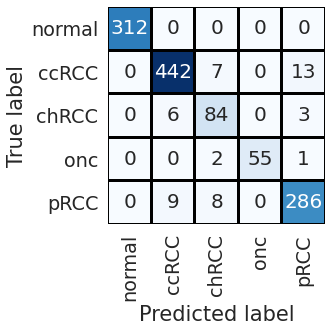

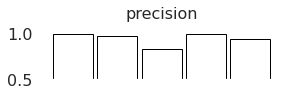

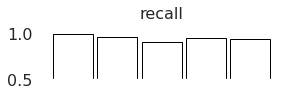

In [435]:
# Re-plotting the summed confusion matrix
from Evaluate import plot_confusion_matrix
cm = sum([s['conf_mat'] for s in scores])

classes = ['normal', 'ccRCC', 'chRCC', 'onc', 'pRCC']

plot_confusion_matrix(cm, 'xgboost_multiclass', save_path = 'figs_xgboost/figs/confusion_matrix_sum.svg', font_size = 36, cm_labels = classes)


# plotting precision and recall bar plots so we can put them along side the confusion matrix

precisions = []
recalls = []

for c in range(cm.shape[1]):
    col = cm[:,c]
    precision = col[c]/sum(col)
    precisions.append(precision)
    
    row = cm[c,:]
    recall = row[c]/sum(row)
    recalls.append(recall)

import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'

f = plt.figure(figsize = (4.28,1))
b = plt.bar([0,1,2,3,4], precisions, width=0.9, color = 'white', edgecolor='black')
yl = plt.ylim([0.5, 1.1])
xt = plt.xticks([])
yt = plt.yticks([0.5, 1], size = 16)
t = plt.title('precision', size = 16)
plt.savefig('figs_xgboost/figs/confusion_matrix_sum_precision_bars.svg', bbox_inches = 'tight')


f = plt.figure(figsize = (4.28,1))
b = plt.bar([0,1,2,3,4], recalls, width=0.9, color = 'white', edgecolor='black')
yl = plt.ylim([0.5, 1.1])
yt = plt.yticks([0.5, 1], size = 16)
xt = plt.xticks([])
t = plt.title('recall', size = 16)
plt.savefig('figs_xgboost/figs/confusion_matrix_sum_recall_bars.svg', bbox_inches = 'tight')



In [515]:
# getting class-wise F1, precision and recall
f1s = np.mean([s['f1'] for s in scores], axis = 0)
precision = np.mean([s['precision'] for s in scores], axis = 0)
recall = np.mean([s['recall'] for s in scores], axis = 0)
class_wise_scores = pd.DataFrame([f1s, precision, recall], index = ['F1', 'Precision', 'Recall'], columns=['normal', 'ccRCC', 'chRCC','onc','pRCC'])
class_wise_scores

class_wise_scores.round(3).to_latex(buf='figs_xgboost/latex_class_wise_scores.txt')

,normal,ccRCC,chRCC,onc,pRCC
F1,1.0,0.962064,0.865339,0.973804,0.943885
Precision,1.0,0.967339,0.831795,1.000000,0.944117
Recall,1.0,0.956872,0.902925,0.949397,0.943735


In [404]:
# best params for each model:
best_params
pd.DataFrame(best_params)

[{'alpha': 0.252728149562772,
  'eta': 0.4813977107793804,
  'lambda': 0.15666460997307652,
  'max_depth': 3,
  'n_estimators': 170},
 {'alpha': 0.3873658449993229,
  'eta': 0.28843368370514055,
  'lambda': 0.4258147203701774,
  'max_depth': 3,
  'n_estimators': 377},
 {'alpha': 0.7076788552891365,
  'eta': 0.16577636844202023,
  'lambda': 0.5015151223508812,
  'max_depth': 3,
  'n_estimators': 140},
 {'alpha': 0.16708066071009398,
  'eta': 0.1481679984376258,
  'lambda': 0.7281508908715555,
  'max_depth': 2,
  'n_estimators': 459}]

,alpha,eta,lambda,max_depth,n_estimators
0,0.252728,0.481398,0.156665,3,170
1,0.387366,0.288434,0.425815,3,377
2,0.707679,0.165776,0.501515,3,140
3,0.167081,0.148168,0.728151,2,459


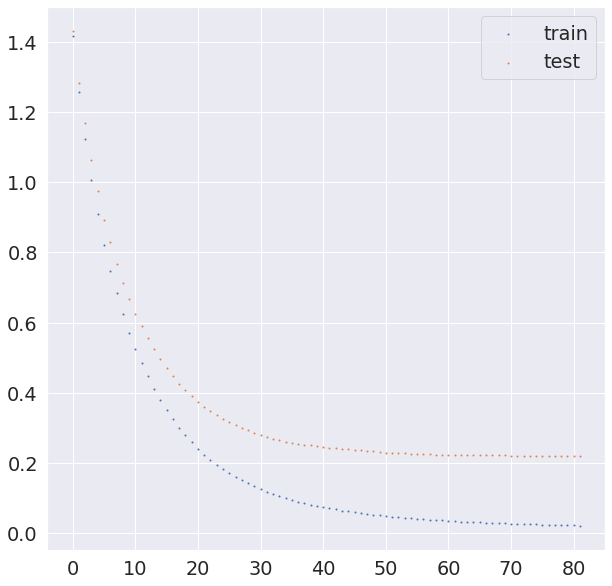

In [88]:
# just checking the eval curves
import pickle
import matplotlib.pyplot as plt

losses = pickle.load(open('figs_xgboost/evals_results/11', 'rb'))

def plot_losses(losses):
    train_losses = losses['validation_0']['mlogloss']
    test_losses = losses['validation_1']['mlogloss']
    plt.figure(figsize = (10, 10))
    train_h = plt.scatter(range(len(train_losses)), train_losses, s = 1)
    test_h = plt.scatter(range(len(test_losses)), test_losses, s = 1)
    plt.legend(handles = [train_h, test_h], labels = ['train', 'test'])
    plt.show()
#     plt.savefig('figs_xgboost/evals_curves/' + name + '_curve.svg')

plot_losses(losses)

### Which samples did we get wrong - and do they have lower tumour purity?

In [89]:
diagnoses = pd.read_csv('data/training_testing_diagnoses_maxgap_50_newdata.csv', sep = ',')
diagnoses
diagnoses = diagnoses.iloc[2:, ]
diagnoses['pooled_labels'] = np.array([4 if d == 5 else d for d in diagnoses['overallpath']])

diagnoses['is_TCGA'] = diagnoses['colname'].str.contains('TCGA')
diagnoses['is_EPIC'] = np.logical_not(diagnoses['colname'].str.contains('TCGA|R'))

diagnoses['predictions'] = np.loadtxt('figs_xgboost/all_test_predictions')
diagnoses['correct'] = diagnoses['predictions'] == diagnoses['pooled_labels']
diagnoses

diagnoses['correct'].sum()
np.logical_not(diagnoses['correct']).sum()

[(diagnoses['pooled_labels'] == i).sum() for i in range(5)]


# incorrect EPICs:
incorrect_EPICs = diagnoses[(diagnoses['is_EPIC'] == True) & (diagnoses['correct'] == False)]

# incorrect TCGAs: (I have looked and no Chopras seem to be incorrect)
incorrect_TCGAs = diagnoses[(diagnoses['is_EPIC'] == False) & (diagnoses['correct'] == False)]

# save
incorrect_EPICs.to_csv('figs_xgboost/incorrectly_predicted_EPIC_samples.csv', index = False)
incorrect_TCGAs.to_csv('figs_xgboost/incorrectly_predicted_TCGA_samples.csv', index = False)

,colname,overallpath
1,seqnames,NaN
2,start,NaN
17,X9970497093_R05C01,3.0
18,X9970497093_R06C01,3.0
19,X9970497093_R01C02,3.0
...,...,...
1262,X6287.T1,2.0
1263,X6261.N1a,0.0
1264,X6261.T1a,4.0
1265,X7044.T1,4.0


/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,colname,overallpath,pooled_labels,is_TCGA,is_EPIC,predictions,correct
17,X9970497093_R05C01,3.0,3.0,False,False,3.0,True
18,X9970497093_R06C01,3.0,3.0,False,False,3.0,True
19,X9970497093_R01C02,3.0,3.0,False,False,3.0,True
20,X9970497093_R02C02,3.0,3.0,False,False,3.0,True
21,X9761749116_R03C01,3.0,3.0,False,False,3.0,True
...,...,...,...,...,...,...,...
1262,X6287.T1,2.0,2.0,False,True,1.0,False
1263,X6261.N1a,0.0,0.0,False,True,0.0,True
1264,X6261.T1a,4.0,4.0,False,True,2.0,False
1265,X7044.T1,4.0,4.0,False,True,4.0,True


1179

49

[312, 462, 93, 58, 303]

### Plot ROC curves

<module 'Evaluate' from '/Tank/kidney_methylation_classification/Evaluate.py'>

(319, 158670)
Testing accuracy: 0.9592476489028213


13

(302, 158670)
Testing accuracy: 0.9701986754966887


9

(310, 158670)
Testing accuracy: 0.9516129032258065


15

(297, 158670)
Testing accuracy: 0.9595959595959596


12

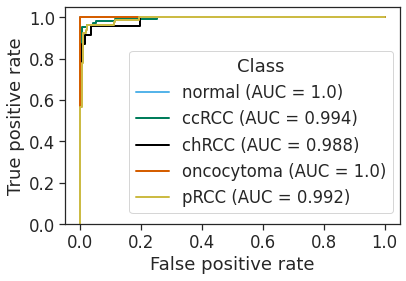

In [486]:
import importlib
import Evaluate
importlib.reload(Evaluate) 

# re-plotting ROC curves

from Evaluate import plot_curve


for i in range(4):
    test_indices = test_indices_list[i] # all indices except test indices
    test_data = data[test_indices, :]
    print(test_data.shape)
    preds = models[i].predict(test_data)
    probs = models[i].predict_proba(test_data)
    y_true = pooled_labels[test_indices]

    print('Testing accuracy:', np.mean(preds == y_true))
    sum(preds != y_true)
    classes = ['normal','ccRCC', 'chRCC', 'oncocytoma', 'pRCC']


    colours = ["#56B4E9", "#007d5b", "#000000", "#D55E00", "#CCBB44"]
    # colour scheme inspired from: https://zenodo.org/record/3381072#.YKPvCZNKjFp


    roc_auc = plot_curve('roc', y_true, probs, len(classes), classes, colours, str(i), save_folder = 'figs_xgboost/figs/')


### Plot PR curves

<module 'Evaluate' from '/Tank/kidney_methylation_classification/Evaluate.py'>

(319, 158670)
Testing accuracy: 0.9592476489028213


13

(302, 158670)
Testing accuracy: 0.9701986754966887


9

(310, 158670)
Testing accuracy: 0.9516129032258065


15

(297, 158670)
Testing accuracy: 0.9595959595959596


12

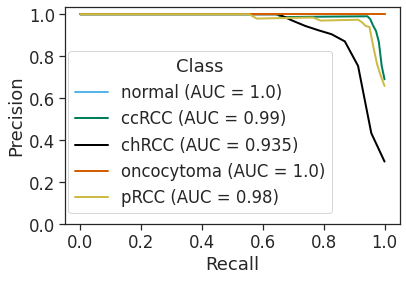

In [482]:
import importlib
import Evaluate
importlib.reload(Evaluate) 

# re-plotting ROC curves

from Evaluate import plot_curve


for i in range(4):
    test_indices = test_indices_list[i] # all indices except test indices
    test_data = data[test_indices, :]
    print(test_data.shape)
    preds = models[i].predict(test_data)
    probs = models[i].predict_proba(test_data)
    y_true = pooled_labels[test_indices]

    print('Testing accuracy:', np.mean(preds == y_true))
    sum(preds != y_true)
    classes = ['normal','ccRCC', 'chRCC', 'oncocytoma', 'pRCC']
    
    colours = ["#56B4E9", "#007d5b", "#000000", "#D55E00", "#CCBB44"]
    # colour scheme inspired from: https://zenodo.org/record/3381072#.YKPvCZNKjFp


    roc_auc = plot_curve('precision_recall', y_true, probs, len(classes), classes, colours, str(i), save_folder = 'figs_xgboost/figs/')

